In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pymysql
from sqlalchemy import create_engine, text

회비 최적화: 58687 KRW
최적화 지점 지출: 3975393.78 KRW
최적화 지점 수입: 3814085.85 KRW


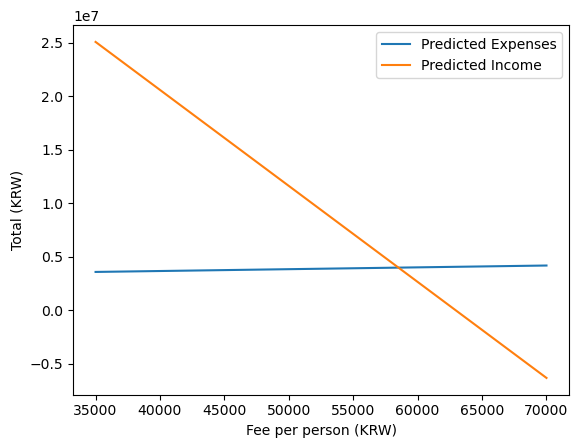

In [ ]:
# 회비와 그에 따른 수입 및 지출 데이터
fees = np.array([35000, 45000, 55000, 65000]).reshape(-1, 1)
# print(fees)
expenses = np.array([3424220, 3937400,3954300, 3990000])  # 각 회비에 따른 총 지출 값
income = np.array([34250001, 3950000, 3970000, 4300000])  # 각 회비에 따른 총 수입 값

# 회비와 지출 간의 관계를 회귀 분석
model_expense = LinearRegression()
model_expense.fit(fees, expenses)

# 회비와 수입 간의 관계를 회귀 분석
model_income = LinearRegression()
model_income.fit(fees, income)

# 각 회비에서의 예측값 출력
optimal_fee = np.linspace(35000, 70000, 100).reshape(-1, 1)
predicted_expenses = model_expense.predict(optimal_fee)
predicted_income = model_income.predict(optimal_fee)
diff = np.abs(predicted_expenses - predicted_income)

# 차이가 최소인 지점을 찾음
min_diff_index = np.argmin(diff)

# 그 지점에서의 회비 값과 지출, 수입 값
optimal_fee_at_break_even = optimal_fee[min_diff_index][0]
predicted_expense_at_break_even = predicted_expenses[min_diff_index]
predicted_income_at_break_even = predicted_income[min_diff_index]

print(f"회비 최적화: {optimal_fee_at_break_even:.0f} KRW")
print(f"최적화 지점 지출: {predicted_expense_at_break_even:.2f} KRW")
print(f"최적화 지점 수입: {predicted_income_at_break_even:.2f} KRW")

# 결과 시각화
plt.plot(optimal_fee, predicted_expenses, label="Predicted Expenses")
plt.plot(optimal_fee, predicted_income, label="Predicted Income")
plt.xlabel("Fee per person (KRW)")
plt.ylabel("Total (KRW)")
plt.legend()
plt.show()

In [ ]:
!pip install mysql-connector-python
!pip install pymysql
!pip install mysqlclient
!pip install config

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pymysql
conn = pymysql.connect(host='localhost', user='root',password='root', db='baemin', port=3306)

In [ ]:
!pip install pandas sqlalchemy pymysql


Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from sqlalchemy import create_engine, text

In [ ]:
# MySQL connection details
host = 'LocaLhost'  # e.g., 'localhost'
user = 'root'  # e.g., 'root'
password = 'root'
database = 'baemin'
table_name = 'fee_details'

# Create the engine to connect to MySQL
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

In [ ]:
df = pd.read_sql_table(table_name, con=engine)
df

,FEE_DETAIL_ID,DATE_ID,INCOME,EXPEND,TOTAL_MONEY,CONTENT
0,1,2023-03-11,2100000,0,2100000,동아리회비
1,2,2023-03-13,0,74700,2025300,네트3개배송비
2,3,2023-03-16,0,750000,1275300,셔틀콕구매
3,4,2023-03-20,0,60000,1215300,체육관이용
4,5,2023-03-21,765000,0,1980300,동아리1차회식비
5,6,2023-03-27,0,1048320,931980,1차회식
6,7,2023-03-29,510000,0,1441980,1차회식(충당)
7,8,2023-04-02,0,40000,1401980,체육관이용
8,9,2023-04-10,0,750000,651980,셔틀콕구매
9,10,2023-04-13,0,60000,591980,체육관이용


In [ ]:
total_income = df['INCOME'].sum()
total_expend = df['EXPEND'].sum()

In [ ]:
# MySQL connection details
host = 'LocaLhost'  # e.g., 'localhost'
user = 'root'  # e.g., 'root'
password = 'root'
database = 'baemin'
table_name = 'total_fees'

# Create the engine to connect to MySQL
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')

table_name='total_fees'
df = pd.read_sql_table(table_name, con=engine)

In [ ]:
insert_query = text(f"""
INSERT INTO total_fees (total_income, total_expend)
VALUES ({total_income}, {total_expend})
""")

In [ ]:
# 데이터 베이스에 연결
## 테이블 안에 데이터 집어넣기
## eninge.begin() : SQLAlchemy에서 engine은 데이터베이스에 연결하는 객체입니다. begin() 메소드는 트랜잭션을 자동으로 관리트랜잭션이 성공하면 자동으로 commit하고, 오류가 발생하면 자동으로 rollback
## as connection :begin()에 의해 생성된 데이터베이스 연결을 connection 객체에 할당. with 문을 사용하면 with 블록이 끝나면 자동으로 연결이 종료되기 때문에 자원 관리가 용이

try:
    with engine.begin() as connection:  # begin() automatically handles commit/rollback
        connection.execute(insert_query, {'total_income': total_income, 'total_expend': total_expend})
        #connection.execute : 데이터베이스에 쿼리를 실행
        # as connection : begin()에 의해 생성된 데이터베이스 연결을 connection 객체에 할당
    print(f"Total income: {total_income}, Total expend: {total_expend} inserted into TOTAL_FEES table.")
    ## 성공적으로 삽입되면 삽입된 수입과 지출의 값을 출력
except Exception as e:
    print(f"An error occurred: {e}")

Total income: [3425000 3425000 3425000], Total expend: 3424220 inserted into TOTAL_FEES table.


회비 최적화: 58687 KRW
최적화 지점 지출: 3975393.78 KRW
최적화 지점 수입: 3814085.85 KRW


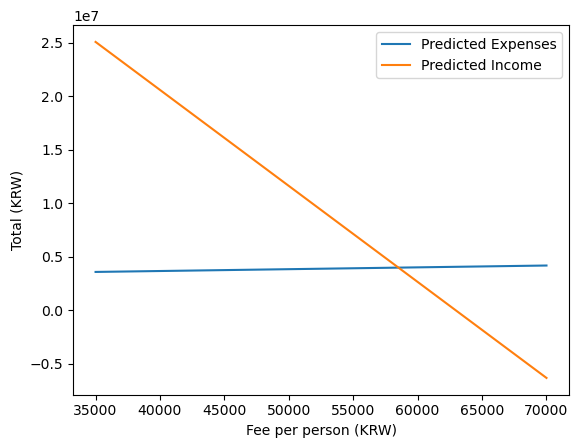

In [ ]:
fees = np.array([35000, 45000, 55000, 65000]).reshape(-1, 1)
# print(fees)
total_expenses = np.array([3424220, 3937400,3954300, 3990000])  # 각 회비에 따른 총 지출 값
total_income = np.array([34250001, 3950000, 3970000, 4300000])  # 각 회비에 따른 총 수입 값

# 회비와 지출 간의 관계를 회귀 분석
model_expense = LinearRegression()
model_expense.fit(fees, total_expenses)

# 회비와 수입 간의 관계를 회귀 분석
model_income = LinearRegression()
model_income.fit(fees, total_income)

# 각 회비에서의 예측값 출력
optimal_fee = np.linspace(35000, 70000, 100).reshape(-1, 1)
predicted_expenses = model_expense.predict(optimal_fee)
predicted_income = model_income.predict(optimal_fee)
diff = np.abs(predicted_expenses - predicted_income)

# 차이가 최소인 지점을 찾음
min_diff_index = np.argmin(diff)

# 그 지점에서의 회비 값과 지출, 수입 값
optimal_fee_at_break_even = optimal_fee[min_diff_index][0]
predicted_expense_at_break_even = predicted_expenses[min_diff_index]
predicted_income_at_break_even = predicted_income[min_diff_index]

print(f"회비 최적화: {optimal_fee_at_break_even:.0f} KRW")
print(f"최적화 지점 지출: {predicted_expense_at_break_even:.2f} KRW")
print(f"최적화 지점 수입: {predicted_income_at_break_even:.2f} KRW")

# 결과 시각화
plt.plot(optimal_fee, predicted_expenses, label="Predicted Expenses")
plt.plot(optimal_fee, predicted_income, label="Predicted Income")
plt.xlabel("Fee per person (KRW)")
plt.ylabel("Total (KRW)")
plt.legend()
plt.show()

[3424220 3424220 3424220 3424220]
[3425000 3425000 3425000 3425000]
Optimized dues: 35000 KRW
Optimized point expenditure: 3424220.00 KRW
Optimized Point Income: 3425000.00 KRW


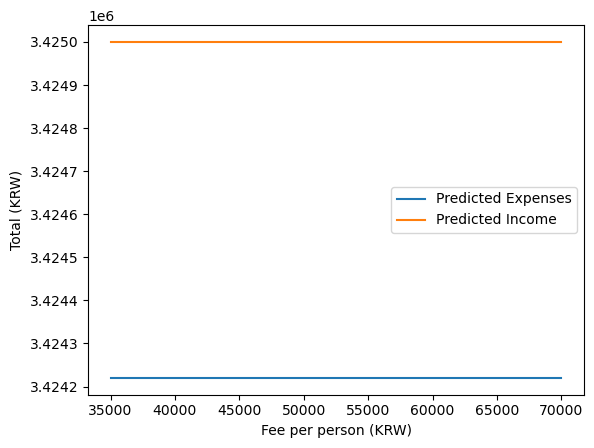

In [ ]:
from sqlalchemy import create_engine, select, Table, MetaData
import pandas as pd
import numpy as np
# MySQL connection details
host = 'LocaLhost'  # e.g., 'localhost'
user = 'root'  # e.g., 'root'
password = 'root'
database = 'baemin'
table_name = 'total_fees'


# Create the engine to connect to MySQL
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')


df = pd.read_sql_table(table_name, con=engine)



metadata = MetaData()
total_fees_table = Table('total_fees', metadata, autoload_with=engine)

# Fetch total_expend and total_income from the database
with engine.connect() as connection:
    # Select the total_expend and total_income columns
    query = select(total_fees_table.c.TOTAL_EXPEND, total_fees_table.c.TOTAL_INCOME)
    result = connection.execute(query)

    # Convert the result to lists for total_expend and total_income
    total_expenses = []
    total_income = []
    for row in result.mappings():
        total_expenses.append(row['TOTAL_EXPEND'])
        total_income.append(row['TOTAL_INCOME'])

    # Convert lists to numpy arrays
    total_expenses = np.array(total_expenses)
    total_income = np.array(total_income)
print(total_expenses)
print(total_income)
# Rest of your regression analysis code remains unchanged
fees = np.array([35000, 45000, 55000, 65000]).reshape(-1, 1)  ############ 수정 테이블 달라서 변경해야함

# Regression analysis for expenses
model_expense = LinearRegression()
model_expense.fit(fees, total_expenses)

# Regression analysis for income
model_income = LinearRegression()
model_income.fit(fees, total_income)

# Predict values for optimal fees
optimal_fee = np.linspace(35000, 70000, 100).reshape(-1, 1)
predicted_expenses = model_expense.predict(optimal_fee)
predicted_income = model_income.predict(optimal_fee)

# Find the optimal fee where the difference between predicted expenses and income is minimum
diff = np.abs(predicted_expenses - predicted_income)
min_diff_index = np.argmin(diff)
optimal_fee_at_break_even = optimal_fee[min_diff_index][0]
predicted_expense_at_break_even = predicted_expenses[min_diff_index]
predicted_income_at_break_even = predicted_income[min_diff_index]

# Output the results
print(f"Optimized dues: {optimal_fee_at_break_even:.0f} KRW")
print(f"Optimized point expenditure: {predicted_expense_at_break_even:.2f} KRW")
print(f"Optimized Point Income: {predicted_income_at_break_even:.2f} KRW")

# Visualize the results
plt.plot(optimal_fee, predicted_expenses, label="Predicted Expenses")
plt.plot(optimal_fee, predicted_income, label="Predicted Income")
plt.xlabel("Fee per person (KRW)")
plt.ylabel("Total (KRW)")
plt.legend()
plt.show()


In [ ]:
### member_ship_fees에서 회비값 가져오는 코드
host = 'LocaLhost'  # e.g., 'localhost'
user = 'root'  # e.g., 'root'
password = 'root'
database = 'baemin'
table_name1= 'member_ship_fees'
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')
member_ship_fees = Table('member_ship_fees', metadata, autoload_with=engine)
with engine.connect() as connection:
    query = select(member_ship_fees.c.MONTHLY_FEE)
    result = connection.execute(query)

    # Convert the result to lists for total_expend and total_income
    MONTHLY_FEE = []

    for row in result.mappings():
        MONTHLY_FEE.append(row['MONTHLY_FEE'])

    # Convert lists to numpy arrays
    MONTHLY_FEE = np.array(MONTHLY_FEE)

print(MONTHLY_FEE)

[]
